<a href="https://colab.research.google.com/github/Aditerminator/custom_fruit_classifier/blob/main/Fruit_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Download data from google and seperate them into different folder nad upload to drive to use**

**2. load drive and dependencies**

In [10]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
## libaries import
import tensorflow as tf
from tensorflow import keras

In [65]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D,MaxPooling2D,Flatten,Dropout
import numpy as np
import os

In [13]:
import os
from PIL import Image

dir_path = '/content/drive/MyDrive/Deep Learning/custom_fruit_classifier/data'
allowed_ext = ['jpeg', 'png']

for folder in os.listdir(dir_path):  # Loop through train and test folders
    for curr_folder in os.listdir(os.path.join(dir_path, folder)):  # Loop through different fruit folders
        for img_dir in os.listdir(os.path.join(dir_path, folder, curr_folder)):
            curr_img_path = os.path.join(dir_path, folder, curr_folder, img_dir)  # Current image path
            curr_img_ext = os.path.splitext(img_dir)[1]  # Current image extension

            if curr_img_ext != '.jpg':
                if os.path.splitext(img_dir)[1][1:].lower() in allowed_ext:  # Check if extension is allowed
                    # Open the image with PIL Image
                    with Image.open(curr_img_path) as im:
                        # Creating name and new path for the old image to be saved as jpg
                        new_img_name = os.path.splitext(img_dir)[0] + '.jpg'
                        new_image_path = os.path.join(dir_path, folder, curr_folder, new_img_name)

                        # Convert the image into the required format
                        im.convert('RGB').save(new_image_path, 'JPEG')
                        print(f"Converted {img_dir} to jpg")

                    # Now remove the old image (images which are not jpg)
                    print(f"Removed the {curr_img_path}")
                    os.remove(curr_img_path)


Converted image38.jpeg to jpg
Removed the /content/drive/MyDrive/Deep Learning/custom_fruit_classifier/data/validate/guava/image38.jpeg
Converted image39.jpeg to jpg
Removed the /content/drive/MyDrive/Deep Learning/custom_fruit_classifier/data/validate/guava/image39.jpeg
Converted image40.jpeg to jpg
Removed the /content/drive/MyDrive/Deep Learning/custom_fruit_classifier/data/validate/guava/image40.jpeg
Converted image37.jpeg to jpg
Removed the /content/drive/MyDrive/Deep Learning/custom_fruit_classifier/data/validate/guava/image37.jpeg
Converted image36.jpeg to jpg
Removed the /content/drive/MyDrive/Deep Learning/custom_fruit_classifier/data/validate/guava/image36.jpeg
Converted image30.jpeg to jpg
Removed the /content/drive/MyDrive/Deep Learning/custom_fruit_classifier/data/validate/guava/image30.jpeg
Converted image29.jpeg to jpg
Removed the /content/drive/MyDrive/Deep Learning/custom_fruit_classifier/data/validate/guava/image29.jpeg
Converted image24.jpeg to jpg
Removed the /conte

In [14]:
## use in case data contains from error images like verctor
import os
from PIL import Image

dir_path = '/content/drive/MyDrive/Deep Learning/custom_fruit_classifier/data'
allowed_ext = ['jpeg', 'png']

for folder in os.listdir(dir_path):  # Loop through train and test folders
    for curr_folder in os.listdir(os.path.join(dir_path, folder)):  # Loop through different fruit folders (apple,watermelon ect)
        for img_dir in os.listdir(os.path.join(dir_path, folder, curr_folder)):
            curr_img_path = os.path.join(dir_path, folder, curr_folder, img_dir)  # Current image path
            curr_img_ext = os.path.splitext(img_dir)[1]  # Current image extension

            if curr_img_ext != '.jpg':
                    print(f"Removed the {curr_img_path}")
                    os.remove(curr_img_path)

Removed the /content/drive/MyDrive/Deep Learning/custom_fruit_classifier/data/validate/guava/Pink_Guava_5_FGT_650x_57a3d235-ba4a-44c3-871f-e582296cd233.webp
Removed the /content/drive/MyDrive/Deep Learning/custom_fruit_classifier/data/Train/guava/Ashokavanam_Guava_Lucknow-49_Fruit_Plant_241.webp
Removed the /content/drive/MyDrive/Deep Learning/custom_fruit_classifier/data/Train/guava/guava.webp
Removed the /content/drive/MyDrive/Deep Learning/custom_fruit_classifier/data/Train/guava/vumtcd7ht0l.webp
Removed the /content/drive/MyDrive/Deep Learning/custom_fruit_classifier/data/Train/guava/v4-460px-Eat-Guava-Step-3-Version-3.jpg.webp


**Now the preprocessing is done, all the images are in required extension**

**Buliding model**

In [15]:
## As The Images are less,I will use a ImageDataGenerator for agumentaion the training data

from keras.preprocessing.image import ImageDataGenerator

In [60]:
train_datagen=ImageDataGenerator(
    rotation_range=20,
    width_shift_range=.2,
    height_shift_range=.2,
    shear_range=.2,
    fill_mode='reflect',
    zoom_range=.5,
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1./255
);

train_generator=train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Deep Learning/custom_fruit_classifier/data/Train',
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical'
)

Found 655 images belonging to 5 classes.


In [61]:
validation_datagen=ImageDataGenerator(
    rescale=1./255
)

validation_generator=validation_datagen.flow_from_directory(
    "/content/drive/MyDrive/Deep Learning/custom_fruit_classifier/data/validate",
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical'
)

Found 272 images belonging to 5 classes.


**Building the Actual Model**

In [62]:
from keras import regularizers

# model construction
model = Sequential()

# CNN architecture
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))

# flattening the output
model.add(Flatten())

# Fully Connected layers
model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)))  # adding L2 regularization
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))  # adding L2 regularization
model.add(Dropout(0.5))

# output layer
model.add(Dense(5, activation='softmax'))

# model compilation
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [63]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_29 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_30 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 17, 17, 128)      

***Finally now Training the model for the Input***

In [66]:
## traing the model

history=model.fit(
    train_generator,
    steps_per_epoch=5,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=2
)

Epoch 1/50
5/5 [==============================] - ETA: 0s - loss: 2.9520 - accuracy: 0.3875

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


5/5 [==============================] - 3s 676ms/step - loss: 2.9520 - accuracy: 0.3875 - val_loss: 2.8828 - val_accuracy: 0.4531
Epoch 2/50
5/5 [==============================] - 5s 1s/step - loss: 2.8768 - accuracy: 0.3125 - val_loss: 2.7340 - val_accuracy: 0.4062
Epoch 3/50
5/5 [==============================] - 3s 734ms/step - loss: 2.7033 - accuracy: 0.3636 - val_loss: 2.4460 - val_accuracy: 0.5625
Epoch 4/50
5/5 [==============================] - 3s 723ms/step - loss: 2.6394 - accuracy: 0.3636 - val_loss: 2.2897 - val_accuracy: 0.5625
Epoch 5/50
5/5 [==============================] - 3s 638ms/step - loss: 2.5043 - accuracy: 0.4126 - val_loss: 2.3118 - val_accuracy: 0.5781
Epoch 6/50
5/5 [==============================] - 3s 616ms/step - loss: 2.4803 - accuracy: 0.3750 - val_loss: 2.2503 - val_accuracy: 0.5938
Epoch 7/50
5/5 [==============================] - 3s 688ms/step - loss: 2.3742 - accuracy: 0.4125 - val_loss: 2.1838 - val_accuracy: 0.4375
Epoch 8/50
5/5 [==================

In [67]:
## plotting the loss and accuracy
import matplotlib.pyplot as plt


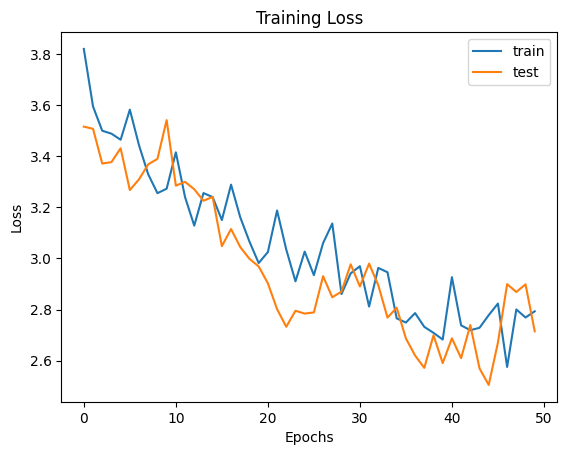

In [45]:
import matplotlib.pyplot as plt

# Plot training loss
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


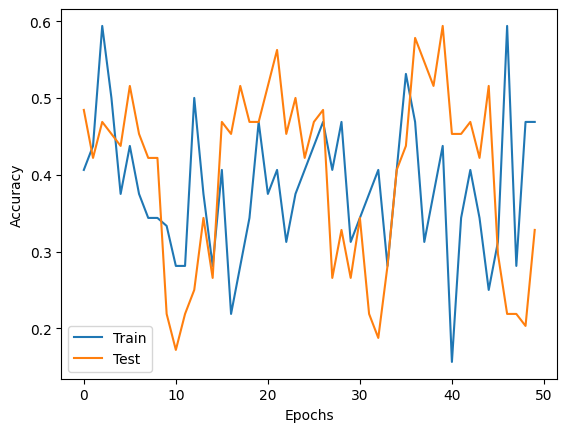

In [53]:
plt.plot(history.history['accuracy'],label='Train')
plt.plot(history.history['val_accuracy'],label='Test')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [58]:
## nothing just converting the testing images for test

path='/content/drive/MyDrive/Deep Learning/custom_fruit_classifier/data/test'

for image in os.listdir(path):
  ip=os.path.join(path,image)
  with Image.open(ip) as im:
    new_name=os.path.splitext(image)[0]+'jpg'
    new_path=os.path.join(path,new_name)
    im.convert('RGB').save(new_path,'JPEG')
    os.remove(os.path.join(path,image))

1/1 [==============================] - 0s 19ms/step


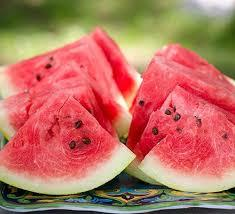

Predicted class: WaterMelon
Accuracy: 73.62%


In [79]:
import cv2
image_path='/content/drive/MyDrive/Deep Learning/custom_fruit_classifier/data/test/download (1)jpg'

##RRR
#read
img=cv2.imread(image_path)
#resize
img=cv2.resize(img,(150,150))
#rescale the pixel
img=img/255.

#to_nparray to match the input shape expected by the model
img=np.expand_dims(img,axis=0)


## prediction
prediction=model.predict(img)

# Get the predicted class label and probability
predicted_class = np.argmax(prediction)
accuracy = prediction[0][predicted_class] * 100

# Define class labels (replace with your own class labels)
class_labels = ['Peer', 'pomegranate', 'apple', 'guava', 'WaterMelon']

# Display the image
from google.colab.patches import cv2_imshow

# Display the image
cv2_imshow(cv2.imread(image_path))
# Display the prediction and accuracy percentage
print(f'Predicted class: {class_labels[predicted_class]}')
print(f'Accuracy: {accuracy:.2f}%')